In [3]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import ast



In [4]:
# API that I got the dataset from the APIKey is the one time created 
url = "https://api.rawg.io/api/games?search=action&key=a2c7d79b4da14f13a8a21b7c32af91ff"

response = requests.get(url)
data = response.json()
# data

In [5]:
# Replace with the actual API key from RAWG
api_key = "a2c7d79b4da14f13a8a21b7c32af91ff"
base_url = "https://api.rawg.io/api/games"

# Parameters for the API request
params = {
    "key": api_key,
    # maximum per page
    "page_size": 300,  
    # starting page
    "page": 1         
}

all_games = []

# number of pages that retrieve data from
num_pages = 400

for page in range(1, num_pages + 1):
    params["page"] = page
    print(f"Fetching page {page}...")
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        results = data.get("results", [])
        all_games.extend(results)
    else:
        print(f"Error fetching page {page}: {response.status_code}")
        break

# Convert the list of game records into a DataFrame
df = pd.DataFrame(all_games)

# Save the DataFrame to a CSV file
csv_filename = "rawg_games_data.csv"
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")


Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Fetching page 32...
Fetching page 33...
Fetching page 34...
Fetching page 35...
Fetching page 36...
Fetching page 37...
Fetching page 38...
Fetching page 39...
Fetching page 40...
Fetching page 41...
Fetching page 42...
Fetching page 43...
Fetching page 44...
Fetching page 45...
Fetching page 46...
Fetching page 47...
Fetching page 48...
Fetching page 49...
Fetching page 50...
Fetching 

In [6]:
len(df.columns)

30

The cells below is mostly done for data exploratory I commented out because it comes with long list of dictionary data.

In [7]:
# df.info

In [8]:
# df.describe

In [9]:
# df.value_counts

In [10]:
# df.head(3)

In [11]:
df.isnull().sum()

id                        0
slug                      0
name                      0
released                465
tba                       0
background_image         32
rating                    0
rating_top                0
ratings                   0
ratings_count             0
reviews_text_count        0
added                     0
added_by_status           0
metacritic            10990
playtime                  0
suggestions_count         0
updated                   0
user_game             16000
reviews_count             0
saturated_color           0
dominant_color            0
platforms                 0
parent_platforms          0
genres                    0
stores                    0
clip                  16000
tags                      0
esrb_rating           10199
short_screenshots         0
community_rating      12747
dtype: int64

In [12]:
# Null values drop as it does not have value to explore
df = df.drop(['user_game','clip','community_rating'], axis=1)

In [13]:
# Convert 'released' to datetime
df['released'] = pd.to_datetime(df['released'], errors='coerce')

In [14]:
# Extract release year for filtering
df['year'] = df['released'].dt.year

In [15]:
# Drop rows with missing 'released' or 'name'
df = df.dropna(subset=['released', 'name'])

In [16]:
# Convert complex stringified JSON fields to Python objects
def parse_column(row):
    try:
        return ast.literal_eval(row)
    except:
        return []


In [17]:
df['genres_list'] = df['genres'].apply(lambda x: [g['name'] for g in parse_column(x)])
df['platforms_list'] = df['platforms'].apply(lambda x: [p['platform']['name'] for p in parse_column(x)])

In [18]:

# Drop unused or low-value columns
columns_to_drop = ['slug', 'background_image', 'added_by_status', 'saturated_color',
                   'dominant_color', 'parent_platforms', 'tags', 'stores',
                   'short_screenshots', 'updated']
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
df['esrb_rating_clean'] = df['esrb_rating'].apply(lambda x: x['name'] if isinstance(x, dict) and 'name' in x else 'Not Rated')


In [20]:
# To compare values in these columns
df[['ratings','ratings_count','rating_top']].head(10)

,ratings,ratings_count,rating_top
0,"[{'id': 5, 'title': 'exceptional', 'count': 42...",7068,5
1,"[{'id': 5, 'title': 'exceptional', 'count': 53...",6856,5
2,"[{'id': 5, 'title': 'exceptional', 'count': 41...",5869,5
3,"[{'id': 4, 'title': 'recommended', 'count': 16...",3562,4
4,"[{'id': 4, 'title': 'recommended', 'count': 24...",3991,4
5,"[{'id': 5, 'title': 'exceptional', 'count': 29...",4839,5
6,"[{'id': 4, 'title': 'recommended', 'count': 17...",3333,4
7,"[{'id': 5, 'title': 'exceptional', 'count': 27...",4746,5
8,"[{'id': 5, 'title': 'exceptional', 'count': 39...",5203,5
9,"[{'id': 5, 'title': 'exceptional', 'count': 22...",4095,5


In [21]:
# Explore values in these features
df['ratings'][0],df['ratings_count'][0]

([{'id': 5, 'title': 'exceptional', 'count': 4237, 'percent': 59.0},
  {'id': 4, 'title': 'recommended', 'count': 2350, 'percent': 32.73},
  {'id': 3, 'title': 'meh', 'count': 456, 'percent': 6.35},
  {'id': 1, 'title': 'skip', 'count': 138, 'percent': 1.92}],
 7068)

In [22]:
df.columns

Index(['id', 'name', 'released', 'tba', 'rating', 'rating_top', 'ratings',
       'ratings_count', 'reviews_text_count', 'added', 'metacritic',
       'playtime', 'suggestions_count', 'reviews_count', 'platforms', 'genres',
       'esrb_rating', 'year', 'genres_list', 'platforms_list',
       'esrb_rating_clean'],
      dtype='object')

In [23]:
df.to_csv("cleaned_rawg_games_data.csv", index=False)

In [24]:
df.isnull().sum()

id                        0
name                      0
released                  0
tba                       0
rating                    0
rating_top                0
ratings                   0
ratings_count             0
reviews_text_count        0
added                     0
metacritic            10528
playtime                  0
suggestions_count         0
reviews_count             0
platforms                 0
genres                    0
esrb_rating            9761
year                      0
genres_list               0
platforms_list            0
esrb_rating_clean         0
dtype: int64

## Most Popular Platforms

Which gaming platforms have the most games in this dataset? By exploding the platforms_list, we count how many games are available on each platform and visualize the top platforms. A platform with a higher count means more games have been released on it.

In [26]:
df['platforms_list']

0        [PC, PlayStation 5, Xbox Series S/X, PlayStati...
1        [Xbox Series S/X, PlayStation 5, macOS, PlaySt...
2        [PlayStation 3, PC, Xbox 360, Linux, macOS, Xb...
3                     [PC, Linux, Xbox 360, PlayStation 3]
4        [PlayStation 3, Xbox 360, macOS, PC, Xbox One,...
                               ...                        
15995                            [Android, PC, iOS, macOS]
15996                                 [Wii, PlayStation 3]
15997    [PlayStation 3, Wii, Nintendo DS, PSP, Xbox 36...
15998                                      [PlayStation 3]
15999                                      [PlayStation 3]
Name: platforms_list, Length: 15535, dtype: object

In [27]:
df['released']

0       2013-09-17
1       2015-05-18
2       2011-04-18
3       2012-08-21
4       2013-03-05
           ...    
15995   2013-06-26
15996   2010-07-29
15997   2009-09-15
15998   2010-11-16
15999   2011-03-29
Name: released, Length: 15535, dtype: datetime64[ns]

C:\Users\Masoum Saberi\AppData\Local\Temp\ipykernel_17452\1325307058.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='viridis')


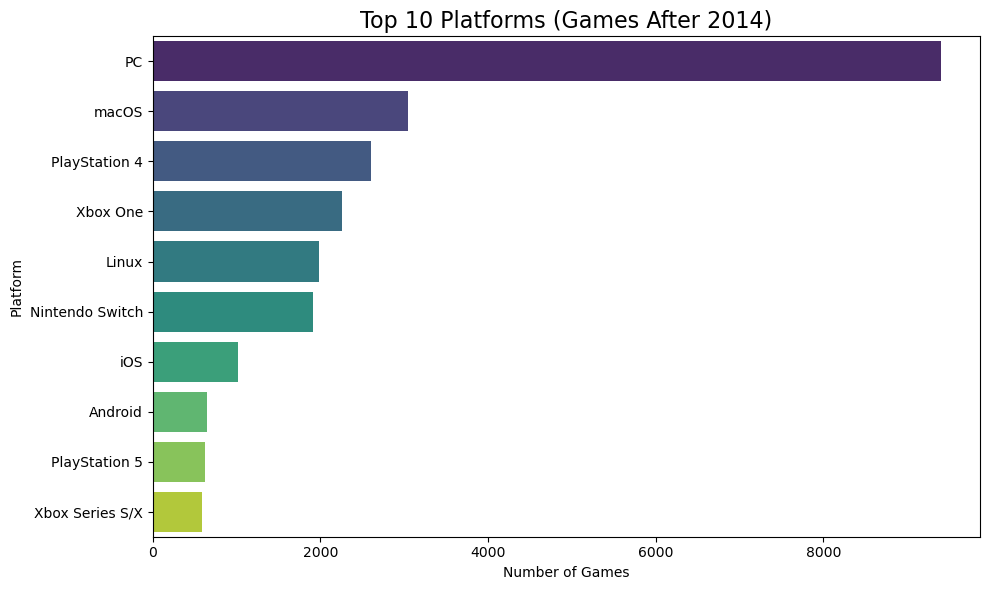

In [28]:
# I wanted to display number of platform for each game but it turn out more that 1 million rows to have them in each row. 
# So, I decided to go with only subset of data and display the top 10 platforms for the games released after 2014

subset = df[df['year'] > 2014]

# Explode the filtered subset
platform_df = subset.explode('platforms_list')

# Count platform frequency
top_platforms = platform_df['platforms_list'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_platforms.values, y=top_platforms.index, palette='viridis')

plt.title('Top 10 Platforms (Games After 2014)', fontsize=16)
plt.xlabel('Number of Games')
plt.ylabel('Platform')
plt.tight_layout()
plt.savefig('TopPlatform.jpg', dpi=3000)
plt.show()


The platform popularity chart shows the number of games available on each platform. PC comes out with the largest library of games, reflecting its open platform. Most of consoles like PlayStation 4 and Xbox One also have high number of games between 2000-3000 games, following behind PC. Newest console rank last, which is expected given their later launch (2020) and relatively shorter time frame in the dataset.

In [29]:
df['genres_list']

0                                    [Action]
1                               [Action, RPG]
2                           [Shooter, Puzzle]
3                                   [Shooter]
4                                    [Action]
                         ...                 
15995                     [Adventure, Puzzle]
15996                                [Action]
15997    [Action, Arcade, Family, Platformer]
15998                        [Action, Arcade]
15999                                [Puzzle]
Name: genres_list, Length: 15535, dtype: object

## Game Releases Over the Years
 
How has the number of video game releases changed over time? I grouped the data by release year and count the number of games released each year, then visualized this trend.

C:\Users\Masoum Saberi\AppData\Local\Temp\ipykernel_17452\1074160690.py:12: UserWarning: The palette list has more values (51) than needed (44), which may not be intended.
  sns.barplot(games_per_year, x='year', y='count', hue='count', palette=colors , legend=False)
C:\Users\Masoum Saberi\AppData\Local\Temp\ipykernel_17452\1074160690.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


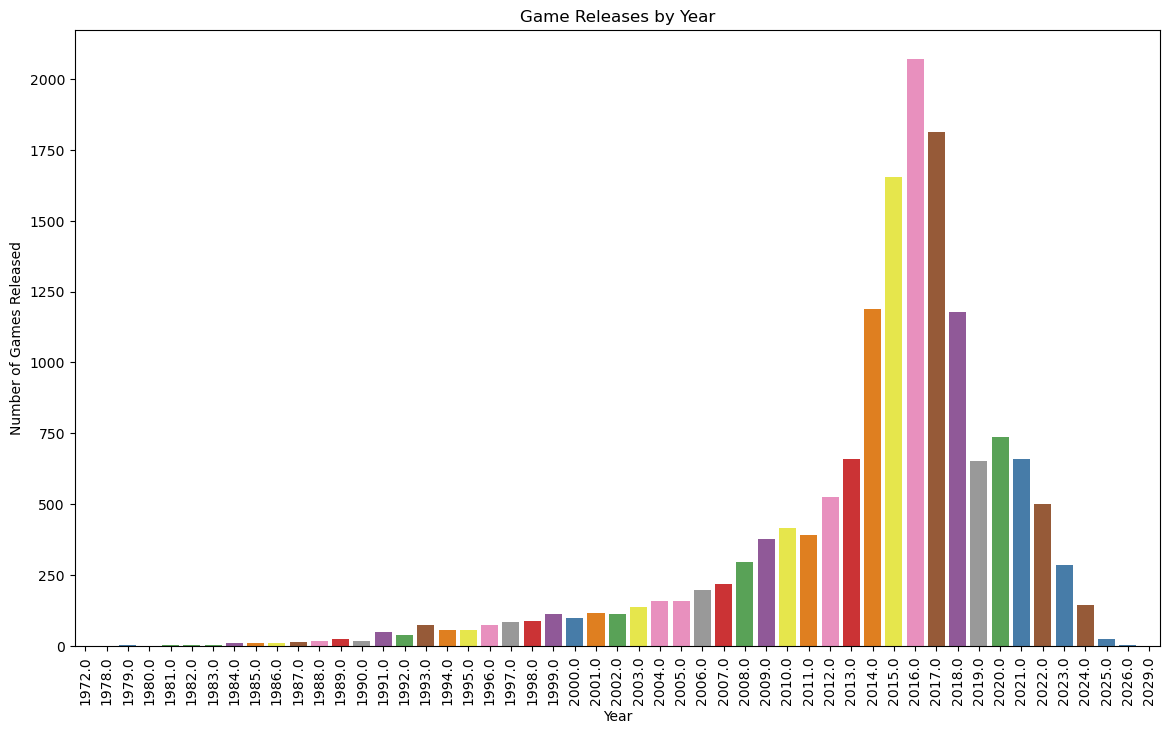

In [30]:
# Aggregate number of game releases by year
games_per_year = df['year'].value_counts().reset_index()
games_per_year.columns = ['year', 'count']
games_per_year = games_per_year.sort_values('year')

# Bar chart of game releases by year
fig = plt.figure(figsize = (14,8))

#  other palettes I liked: "magma", "Set2", "coolwarm", "viridis", etc.
colors = sns.color_palette("Set1", len(games_per_year))  

sns.barplot(games_per_year, x='year', y='count', hue='count', palette=colors , legend=False)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Game Releases by Year')
plt.xticks(rotation=90)
plt.savefig('ReleaseByYear.jpg', dpi=3000)
fig.show()


Game releases by year show a clear upward trend. Early years (1970s–1980s) saw relatively few titles, but the rate of releases accelerated in the 1990s and especially after the 2000s. This shows the growth of the video game industry, with a coming new games as gaming became more accessible and popular. 2016 is the top released year in video gaming industry.

## Distribution of average user ratings

I examined how user ratings are distributed across games. The rating field represents the average user score for each game (on a 0 to 5 scale). Histogram was plotted out of these average ratings to see which scores are most common. 

In [38]:
# To display that the user rating distribution has lots of rating that are zero.
len(df[df['rating'] == 0])

3457

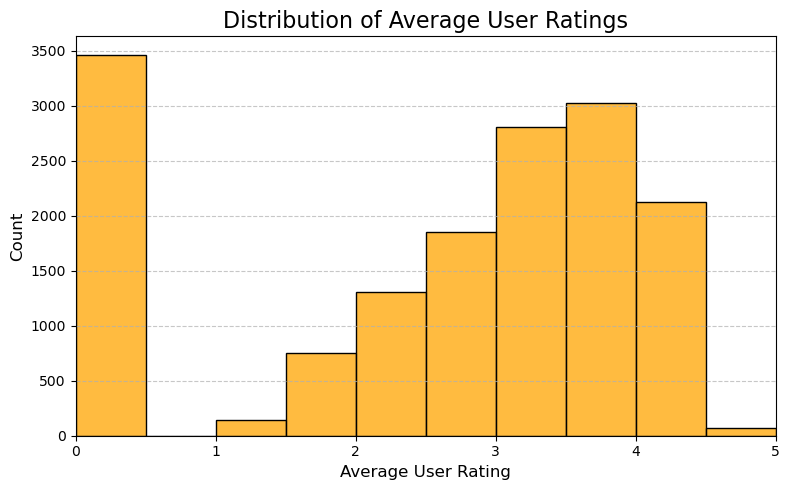

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, binrange=(0, 5), color='orange', kde=False)

plt.title('Distribution of Average User Ratings', fontsize=16)
plt.xlabel('Average User Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# The X axis would start from 0 to 5
plt.xlim(0, 5)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('AveUsrRating.jpg', dpi=3000)
plt.show()


The distribution of average user ratings is roughly bell-shaped and centered around 3.5 out of 5. This indicates that most games receive moderate to good user scores. The majority of ratings are in the 3–4.5 range. Very few games have extremely low (<2) or perfect 5 average understanding that outstanding games are rare in the dataset.

## Average Rating by Genre
Do certain genres tend to have higher user ratings? To investigate, the average user rating was calculated for each genre. Since games can belong to multiple genres, I explode the genres_list such that each game-genre combination is its own row, then calculate the mean rating per genre.

C:\Users\Masoum Saberi\AppData\Local\Temp\ipykernel_17452\330142223.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=genre_exploded, x='rating', y='genres_list', palette='rocket')


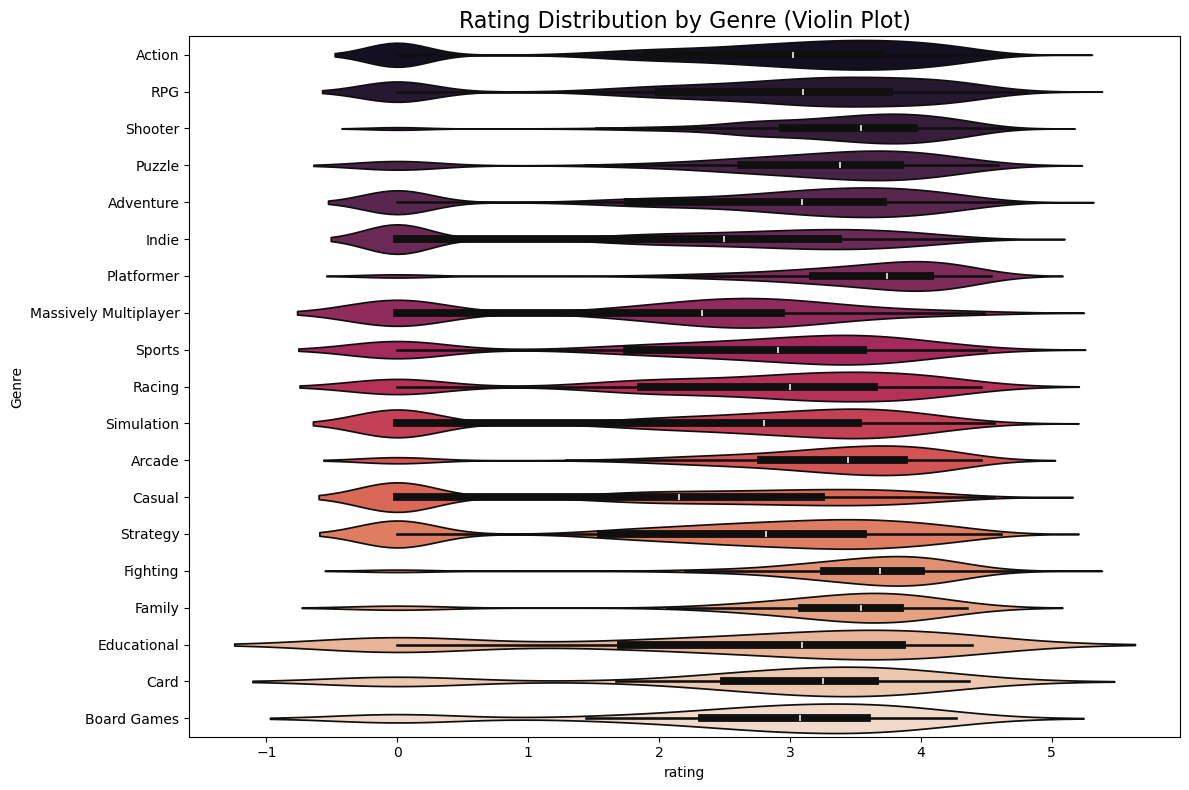

In [33]:
# Compute average user rating by genre
genre_exploded = df.explode('genres_list').reset_index(drop=True)
genre_avg = genre_exploded.groupby('genres_list')['rating'].mean().reset_index()
genre_avg.columns = ['Genre', 'AvgRating']
genre_avg = genre_avg.sort_values('AvgRating', ascending=False)



fig = plt.figure(figsize=(12, 8))
sns.violinplot(data=genre_exploded, x='rating', y='genres_list', palette='rocket')

plt.title('Rating Distribution by Genre (Violin Plot)', fontsize=16)
# plt.xlabel('Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('AveRatingByGenere.jpg', dpi=3000)
plt.show()


There are some observable differences in user ratings across genres. For example, in this dataset Indie and RPG games have slightly higher average user ratings, compared to genres like Racing or Casual. However, the differences are not very large – most genres have average ratings between 3.4 and 3.6. This suggests that player satisfaction is relatively consistent across genres, with no genre dramatically outperforming others in quality.

## User Rating vs. Metacritic Score
Now I explore the relationship between user ratings and critic scores. Intuitively, one might expect that games loved by players also receive high Metacritic scores from critics (and vice versa). I created a scatter plot of each game’s user rating vs. its Metacritic score. Each point represents a game. I also compute the Pearson correlation to quantify the relationship.

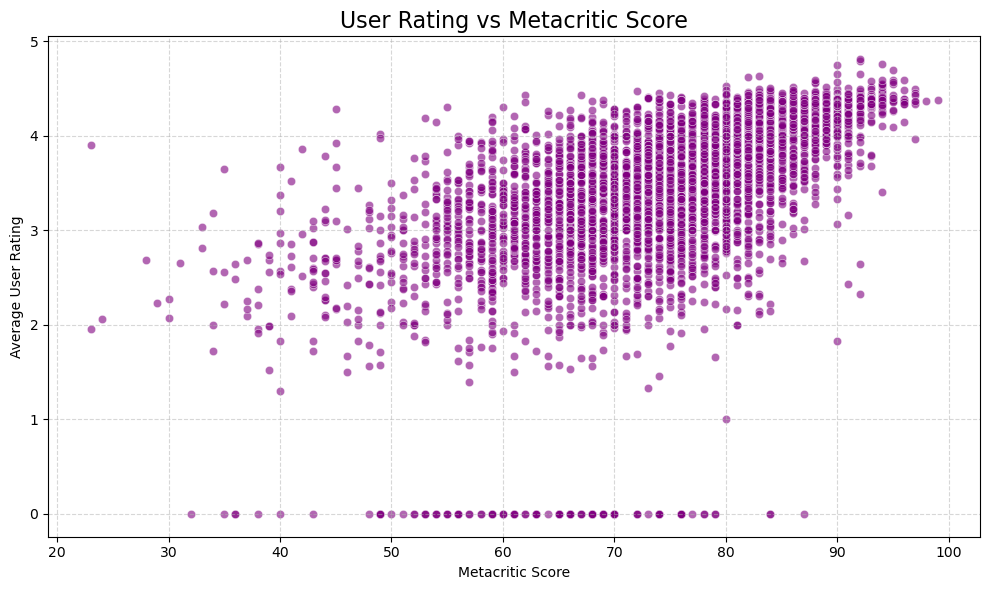

In [34]:
# Drop missing values
df_corr = df.dropna(subset=['rating', 'metacritic'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_corr, x='metacritic', y='rating', color='purple', alpha=0.6)

plt.title('User Rating vs Metacritic Score', fontsize=16)
plt.xlabel('Metacritic Score')
plt.ylabel('Average User Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('RatingvsMetacritic.jpg', dpi=3000)
plt.show()



The scatter plot reveals a strong positive correlation between user ratings and Metacritic scores. In general, games that score highly with critics also tend to be highly rated by players, as evidenced by the upward trend of the points. Always, there are a few outliers – some games have higher user praise than their Metacritic score would suggest (and vice versa) – but overall the agreement is significant. This trend displays that quality tends to be recognized by both players and professional critics.

## Top Games by Rating and Popularity

Finally, I look at the top games in the dataset from two perspectives: by user rating, and by popularity. Top-rated games are those with the highest average user ratings. Most popular games are those that have received the most user ratings (an indicator of how many people have played and rated the game). I listed the top 10 games in each category.

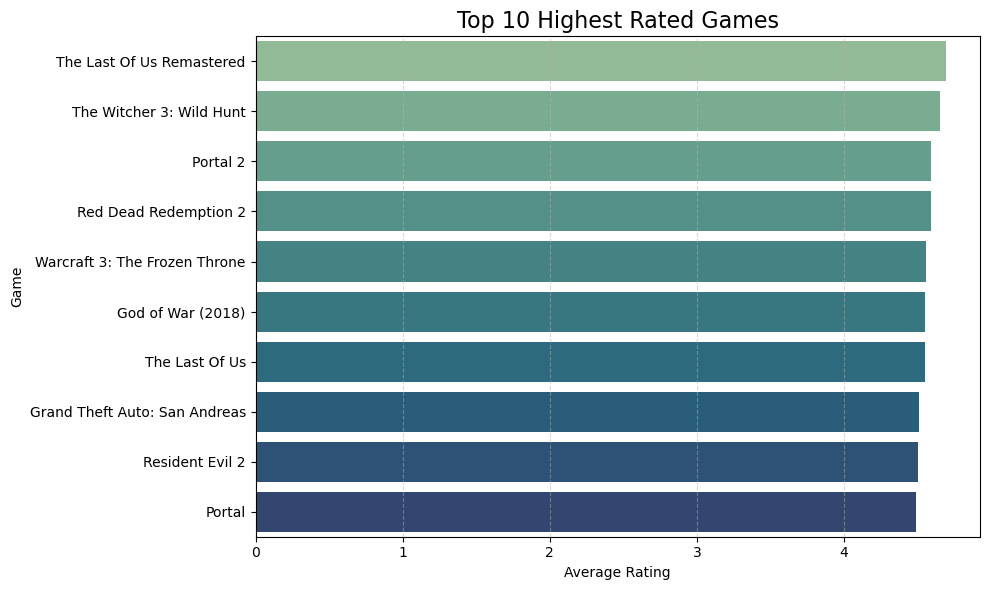

In [41]:
# Top 10 games by average rating
top_rated = df[df['ratings_count'] >= 1000].nlargest(10, 'rating')
top_rated = top_rated.sort_values('rating', ascending=False)

# Top 10 Highest Rated Games ---
plt.figure(figsize=(10, 6))
sns.barplot(data=top_rated, x='rating', y='name', hue= 'name', legend= False, palette='crest')

plt.title('Top 10 Highest Rated Games', fontsize=16)
plt.xlabel('Average Rating')
plt.ylabel('Game')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('Top10HighestRate.jpg', dpi=3000)
plt.show()


The chart above lists the top 10 games by average user rating. These are the games that players rated most highly (among those with a large number of ratings). We can see that critically titles like Red Dead Redemption 2,  Portal 2, and God of War (2018) top the list with average ratings around 4.5–4.7 out of 5. This indicates an overwhelmingly positive reception from the community. Many of these games are award-winning and often cited as some of the best in their genre, which aligns with their high user scores.

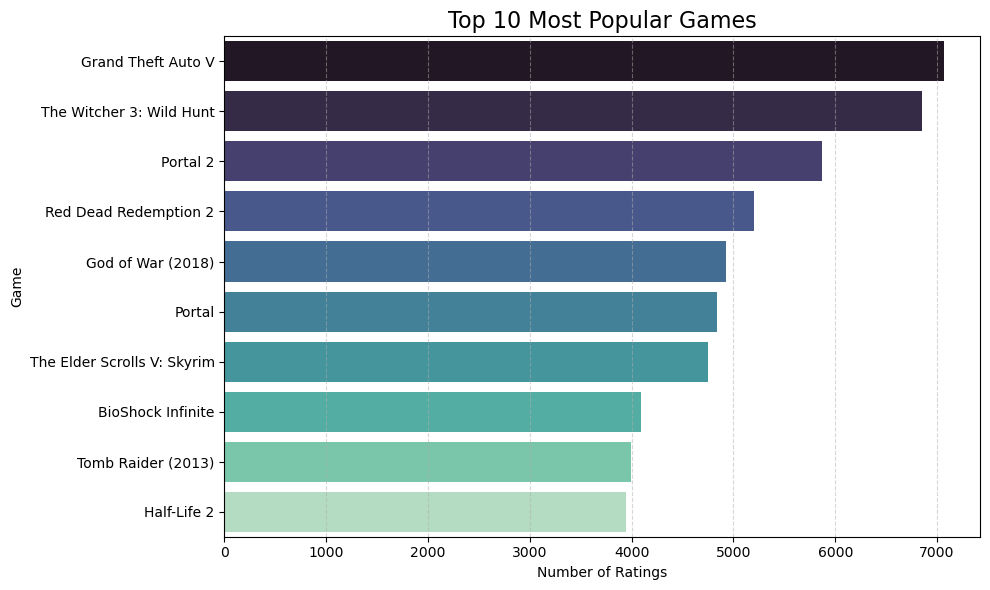

In [42]:
# Top 10 games by popularity (number of ratings)
top_popular = df.nlargest(10, 'ratings_count')
top_popular = top_popular.sort_values('ratings_count', ascending=False)

# Top 10 Most Popular Games
plt.figure(figsize=(10, 6))
sns.barplot(data=top_popular, x='ratings_count', y='name', hue= 'name', legend=False,  palette='mako')

plt.title('Top 10 Most Popular Games', fontsize=16)
plt.xlabel('Number of Ratings')
plt.ylabel('Game')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('MostPopular.jpg', dpi=3000)
plt.show()



In contrast, the top 10 most popular games (by number of user ratings) highlight that the Grand Theft Auto V has the highest count of user ratings in the dataset, showing its massive popularity, followed closely by The Witcher 3: Wild Hunt. Other entries like The Elder Scrolls V: Skyrim, Red Dead Redemption 2, Portal 2, and  God of War have very high engagement. 
Many of these popular games also appeared in the highest-rated list, displaying that games with broad appeal often have high satisfaction between players as well.

##### Conclusion

Through this exploratory analysis, I uncovered several insights about the video game landscape. The number of game releases has grown dramatically over time, especially in the last few decades. Player ratings tend to be on the positive side (mostly between 3 and 4 out of 5), and certain genres (like RPGs and Indie games) show marginally higher average ratings than others. PC and modern consoles host the largest game libraries. I also observed that player and critic opinions generally align, highly-rated games usually earn high Metacritic scores. Finally, the most popular and the best-rated games largely overlap, highlighting that many of the games with the widest reach (e.g. GTA V, Witcher 3, Skyrim) have also garnered exceptional approval from players. This EDA showcases how the RAWG dataset can be used to derive meaningful trends and confirms intuitive expectations about gaming history and preferences.

